In [1]:
from pathlib import Path
import json

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
model_path_base = Path("../resources/models/classifiers/asset_test")
output_path = Path("../results/plots")
output_path.mkdir(exist_ok=True, parents=True)

model_configs = [
    "muss_en_mined_hf-all-def-000000000000-000000000000",
    "muss_en_mined_hf-all-def-111000000000-000000000000",
    "muss_en_mined_hf-all-def-111111000000-000000000000",
    "muss_en_mined_hf-all-def-111111111000-000000000000",
    "muss_en_mined_hf-all-def-111111111111-000000000000",
    "muss_en_mined_hf-all-def-111111111111-111000000000",
    "muss_en_mined_hf-all-def-111111111111-111111000000",
    "muss_en_mined_hf-all-def-111111111111-111111111000",
    "muss_en_mined_hf-all-def-111111111111-111111111111",
    "muss_en_mined_hf-all-avg-000000000000-000000000000",
    "muss_en_mined_hf-all-avg-111000000000-000000000000",
    "muss_en_mined_hf-all-avg-111111000000-000000000000",
    "muss_en_mined_hf-all-avg-111111111000-000000000000",
    "muss_en_mined_hf-all-avg-111111111111-000000000000",
    "muss_en_mined_hf-all-avg-111111111111-111000000000",
    "muss_en_mined_hf-all-avg-111111111111-111111000000",
    "muss_en_mined_hf-all-avg-111111111111-111111111000",
    "muss_en_mined_hf-all-avg-111111111111-111111111111",
]

In [3]:
data = {}
index = []

for model_config in model_configs:
    res = model_path_base / model_config / 'test_results.json'

    if res.exists():
        with open(res, 'r', encoding='utf8') as f:
            data[model_config] = json.loads(f.read())
    else:
        print(f'No test results for {res.parent}')
        
data

{'muss_en_mined_hf-all-def-000000000000-000000000000': {'test_acc:all': 0.2010651573223995,
  'test_acc:len_ratio': 0.1993047508690614,
  'test_acc:lev_sim': 0.19850254033336304,
  'test_acc:tree_depth': 0.20402887957928514,
  'test_acc:word_rank': 0.2024244585078884,
  'test_data': '/data/tkew/projects/ctrl_tokens/resources/data/en/aligned/asset_test.tsv',
  'test_loss': 0.5004757642745972,
  'test_runtime': 92.0587,
  'test_samples': 11219,
  'test_samples_per_second': 121.868,
  'test_steps_per_second': 0.478},
 'muss_en_mined_hf-all-def-111000000000-000000000000': {'test_acc:all': 0.39789642570639094,
  'test_acc:len_ratio': 0.4262411979677333,
  'test_acc:lev_sim': 0.4068098761030395,
  'test_acc:tree_depth': 0.3756127997147696,
  'test_acc:word_rank': 0.38292182904002137,
  'test_data': '/data/tkew/projects/ctrl_tokens/resources/data/en/aligned/asset_test.tsv',
  'test_loss': 0.45247480273246765,
  'test_runtime': 290.3442,
  'test_samples': 11219,
  'test_samples_per_second': 38

In [14]:
df = pd.DataFrame.from_dict(data, orient='index')
# df.drop(columns=['eval_data','eval_loss','eval_runtime','eval_samples','eval_samples_per_second','eval_steps_per_second'], inplace=True)
df.drop(columns=['test_data','test_loss','test_runtime','test_samples','test_samples_per_second','test_steps_per_second'], inplace=True)
df = df.reset_index().rename(columns={'index': 'model'})
df['agg'] = df['model'].apply(lambda x: x.split('-')[2])
df['layers'] = df['model'].apply(lambda x: sum(1 for c in x if c == '1'))
df = df.drop(columns=['model', 'test_acc:all'])
df = df.rename(
    {'test_acc:len_ratio': 'NbChars',
     'test_acc:lev_sim': 'LevSim',
     'test_acc:tree_depth': 'DepTreeDepth',
     'test_acc:word_rank': 'WordRank'
    }, axis='columns'
)
df


,NbChars,LevSim,DepTreeDepth,WordRank,agg,layers
0,0.199305,0.198503,0.204029,0.202424,def,0
1,0.426241,0.406810,0.375613,0.382922,def,3
2,0.580087,0.481683,0.401729,0.391479,def,6
3,0.871557,0.832695,0.538729,0.557358,def,9
4,0.984580,0.841519,0.670291,0.821107,def,12
5,0.997772,0.858544,0.721811,0.843658,def,15
6,0.998574,0.875568,0.757376,0.894821,def,18
7,0.995811,0.864070,0.718692,0.880114,def,21
8,0.990106,0.858365,0.695160,0.892236,def,24
9,0.478296,0.493181,0.491399,0.484981,avg,0


In [15]:
# dfm = df.groupby('agg').melt(id_vars='layers')
# sns.barplot(data=dfm, x='layers', y='value', hue='variable')

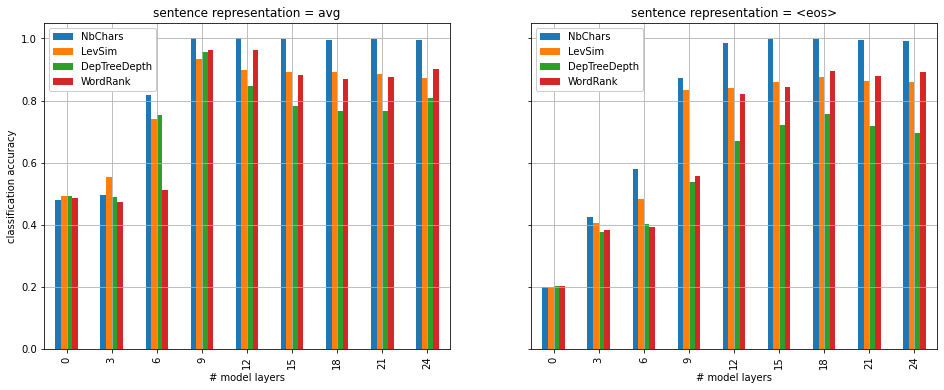

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)
ax0 = df[df['agg'] == 'avg'].plot(
    kind="bar", x='layers', ax=axes[0],
    title='sentence representation = avg',
    grid=True,
    xlabel='# model layers', ylabel='classification accuracy'
)

ax0.legend(loc='upper left').get_frame().set_alpha(None)

ax1 = df[df['agg'] == 'def'].plot(
    kind="bar", x='layers', ax=axes[1],
    title='sentence representation = <eos>',
    grid=True,
    xlabel='# model layers', ylabel='classification accuracy'
)

ax1.legend(loc='upper left').get_frame().set_alpha(None)

plt.savefig(output_path / 'layer-wise_probe.png', dpi=300)